Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# Pré-Introdução à teoria das vibrações

## Aula 5 - Amortecimento viscoso

### *Daniel Barbosa Mapurunga Matos (Aluno PPGEC/UFRGS)*

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## 1.  Equação do amortecedor

O amortecedor é responsável por dissipar energia do sistema e é normalente representado pelo **amortecedor viscoso de Newton** ou pelo **Amortecedor por atrito de Coulomb**. Nesta aula, serão tratados os amortecedores viscosos de Newton, onde a força devido a eles é proporcional a velocidade do sistema.

\begin{align}
F_c &= c\dot{u}
\end{align}

<img src="Figuras/sistema.PNG" width="400">

Onde **C** é chamado de constante de amortecimento.

## 2. Constante de amortecimento e Fator de amortecimento

A constante de amortecimento é diretamente proporcional a frequência natural e a massa do sistema, podendo ser expressa por:

\begin{align}
{c}= 2\eta m= 2\zeta\omega_n m
\end{align}

Em que $m$ é a massa e $\zeta$ é o **Fator de amortecimento**, que, na engenharia civil, varia entre 0.001 e 0.05. A tabela abaixo ilustra o fator de amortecimento de determinadas estruturas.([Fonte](https://github.com/mmaiarocha/PEC00025/blob/master/resources/Class_04_FreeTimeDomain.ipynb))



|  Structure type                                           | $\zeta$  | 
| :---                                                      |   :---:  | 
| Reinforced concrete buildings without stiffning walls     |   0.020  | 
| Reinforced concrete buildings with stiffning walls        |   0.015  | 
| Reinforced concrete towers and chimneys, tappered         |   0.015  | 
| Reinforced concrete towers and chimneys, constant section |   0.010  | 
| Moment resisting steel buildings with welded connections  |   0.010  | 
| Steel towers and chimneys, constant section               |   0.008  |
| Timber structures                                         |   0.030  |




## 3. Decremento logarítmico

A partir de um sinal, é possível definir o fator de amortecimento a partir da seguite equação:

\begin{align}
\zeta = \frac{\ln{( \frac{u_i}{u_{i+N}}})}{2\pi N}
\end{align}

onde $u_i$ e $u_{i+N}$ são duas amplitudes espaçadas por $N$ ciclos, como mostra a figura abaixo:


<img src="Figuras/amortecimento.PNG" width="500">



## 4. Frequência natural amortecida

O amortecedor influencia a frequência natural da estrutura a partir da seguinte expressão:
\begin{align}
\omega_d^2 = \omega_n^2 - \eta^2
\end{align}

Expandindo-se esta equação, chega-se a seguinte relação:
\begin{align}
\omega_d = \omega_n\sqrt{1 - \zeta^2}
\end{align}

Como os valores de $\zeta$ são muito pequenos, é possível afirmar que:
\begin{align}
\omega_d \approx \omega_n
\end{align}

## 5. Resolução da equação de equilíbrio dinâmico

\begin{align}
m \ddot{u} + c \dot{u} + k u &= 0
\end{align}

Para solucionar a equação de equilíbrio dinâmico abaixo, utilizaremos as seguintes transformadas de Laplace:

\begin{align}
\mathscr{L} \left\{ \dot{f}(t)  \right\}     &= -f(0) + s \bar{f}(s) \\
\mathscr{L} \left\{ \ddot{f}(t) \right\}     &= -s f(0) - \dot{f}(0) + s^2 \bar{f}(s) \\
\mathscr{L} \left\{ e^{-at} \cos (\omega t) \right\} &=  \frac{s+a}{(s+a)^2 + \omega^2} \\
\mathscr{L} \left\{ e^{-at} \sin (\omega t) \right\} &=  \frac{\omega}{(s+a)^2 + \omega^2}
\end{align}


Aplicando a transformda de Laplace na equação de equilíbrio, obtemos:

\begin{align}
\mathscr{L}\left\{ m \ddot{u} + c \dot{u} + k u \right\} = 
    m \left[ -s u(0) - \dot{u}(0) + s^2 \bar{u}(s) \right] + \\
    c \left[ -u(0) + s \bar{u}(s) \right] +
    k \bar{u}(s) = 0 
\end{align}

Isolando agora $\bar{u}(s)$, tem-se a seguinte expressão:

\begin{align}
\bar{u}(s) =  
   \left[\frac{(s + \eta)}{(s + \eta)^2 + \omega_{\rm D}^2}\right] u_0 + 
   \left[\frac{\omega_{\rm D}}{(s + \eta)^2 + \omega_{\rm D}^2}\right] 
   \left(\frac{v_0 + \eta u_0}{\omega_{\rm D}} \right) 
\end{align}

Voltando agora ao domínio do tempo,encontra-se a equação de equilíbrio dinâmico para um sistema com amortecimento viscoso( lembrando que $\eta = 2\zeta\omega_n$):

\begin{align}
u(t) = e^{- \zeta \omega_{\rm n} t}
   \left[ u_0 \cos \omega_{\rm D}t + \left( \frac{v_0 + \zeta \omega_{\rm n} u_0}
   {\omega_{\rm D}} \right) \sin \omega_{\rm D}t  \right] 
\end{align}

O script abaixo ilustra este estipo de movimento

In [8]:
z  = 0.01                        # Fator de amortecimento
m  = 200                         # Massa do sistema
wn = 2                           # Frequência natural do sistema
wd = wn*np.sqrt(1-z**2)          # Frequência natural amortecida
u0 = 5
v0 = 7
t = np.linspace(0,100,500)
u  = np.exp(-z*wn*t)*(u0*np.cos(wd*t) + (v0+z*wn*u0)*np.sin(wd*t)/wd) 


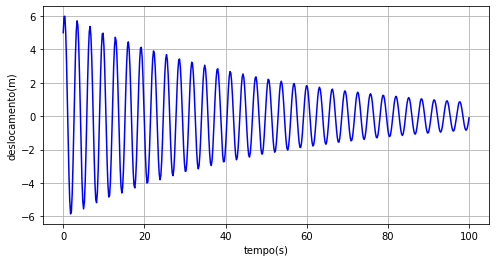

In [9]:
plt.figure(1,figsize=(8,4))
plt.plot(t,u,'b')
plt.xlabel('tempo(s)') ; plt.ylabel('deslocamento(m)')
plt.grid(True)